<h1> Introduction </h1>

<div class="alert alert-info">
  <strong>In a previous project, I employed Pearson correlation to investigated the relationship between broadband internet speed and internet usage and GDP per country. Rather than stopping at simple correlation, I now shift toward a hypothesis-driven regression analysis to test a directional claim, but only for the internet usage part. The data comes from the website Kaggle. 
    </strong>
</div>

## Outline

<div class="alert alert-success">
  <strong>   
  <ol>
      <li>Importing the packages/datasets</li>
      <li>Regression Analysis</li>
      <li>Results</li>
  </ol>
  </strong>
</div>

### 1. Importing the packages/datasets

In [1]:
import requests
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

<blockquote>
    Here I am loading the data from my Github repo using the request module, since I could not find an API for the datasets on Kaggle.
</blockquote>

In [2]:
r = requests.get('https://raw.githubusercontent.com/NinaMirey/datasets-for-correlation-analysis/main/internetData_with_gdp.csv')
f = open('internetData_with_gdp.csv', 'wb')
f.write(r.content)
f.close()
df = pd.read_csv("internetData_with_gdp.csv")
df

,country,avgBroadbandMbps,internetUsers,population,userPercent,gdpPerCapUsd
0,Monaco,192.68,37553,38695,97.05%,190513.0
1,Singapore,192.01,4821119,5708844,84.45%,79576.0
2,Chile,189.36,14864456,18054726,82.33%,15941.0
3,Thailand,184.03,36513941,69037513,52.89%,7631.0
4,Denmark,163.60,5567278,5733551,97.10%,68094.0
...,...,...,...,...,...,...
162,Yemen,2.74,7548512,28250420,26.72%,891.0
163,Ethiopia,2.69,19543075,104957438,18.62%,1040.0
164,Cuba,1.90,5638956,11484636,49.10%,9478.0
165,Turkmenistan,1.89,1223591,5758075,21.25%,7411.0


#### Overview of interesting data:

<blockquote>
<b>Country:</b> Which country is this?<br>
<b>AvgBroadbandMbps:</b> Average bandwidth speed<br>
<b>UserPercent:</b> What percentage of internet users does each country have?<br>
<b>Gpd:</b> What is the country's GDP?<br>
</blockquote>

## Q1: Directional hypothesis and tests

#### Hypothesis:

<blockquote>
    <b>H1:</b> Countries with higher internet user percentages have higher GDPs.<br>
    <b>H0:</b> There is no positive relationship between internet usage and GDP.<br>
    <br>
    Based on economic development theory, better access to technology (e.g., internet) is expected to foster productivity and GDP growth.<br>
    No theoretical reason to expect higher internet usage to lower GDP.<br>
</blockquote>

In [3]:
#clean data
df['userPercent'] = df['userPercent'].str.replace('%', '').astype(float)
df= df.dropna(subset=['gdpPerCapUsd', 'userPercent'])

#define X and y
X= sm.add_constant(df['userPercent'])
y= df['gdpPerCapUsd']
model=sm.OLS(y, X).fit()

#extract regression results
coef = model.params['userPercent']
se = model.bse['userPercent']
t_value = model.tvalues['userPercent']
p_two_sided = model.pvalues['userPercent']
p_one_sided = p_two_sided / 2 if coef > 0 else 1 - (p_two_sided / 2)
ci_95 = model.conf_int().loc['userPercent']

#display
print(f"Coefficient (β1): {coef:.2f}")
print(f"Standard Error: {se:.2f}")
print(f"T-statistic: {t_value:.2f}")
print(f"Two-sided p-value: {p_two_sided:.2e}")
print(f"One-sided p-value: {p_one_sided:.2e}")
print(f"95% Confidence Interval: [{ci_95[0]:.2f}, {ci_95[1]:.2f}]")

Coefficient (β1): 677.63
Standard Error: 64.78
T-statistic: 10.46
Two-sided p-value: 7.69e-20
One-sided p-value: 3.85e-20
95% Confidence Interval: [549.70, 805.56]


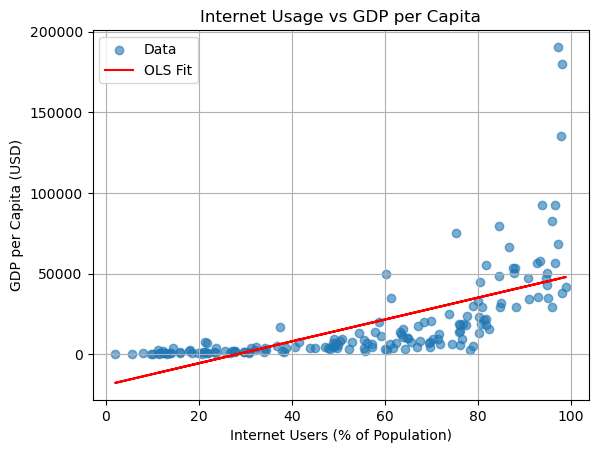

In [4]:
#scatterplot for viz
plt.scatter(df['userPercent'], df['gdpPerCapUsd'], alpha=0.6, label='Data')
plt.plot(df['userPercent'], model.predict(X), color='red', label='OLS Fit')
plt.xlabel('Internet Users (% of Population)')
plt.ylabel('GDP per Capita (USD)')
plt.title('Internet Usage vs GDP per Capita')
plt.legend()
plt.grid(True)
plt.show()

## 3. Results

**Hypothesis**: Countries with higher internet usage (as % of population) have higher GDP per capita.

**Regression Coefficient (userPercent → gdpPerCapUsd):**
+677.63 — For each 1% increase in internet usage, GDP per capita increases by approximately $678.

**Two-sided p-value:** 7.69 × 10⁻²⁰  
**One-sided p-value:** 3.85 × 10⁻²⁰

**95% Confidence Interval (two-sided):** [549.70, 805.56]


<div class="alert alert-success"> 

**Conclusion:**
- The effect is **positive** and **statistically significant**.
- The one-sided test confirms the same conclusion but with **greater power**.
- The relationship supports the directional hypothesis that more internet usage is associated with higher GDP.

</div>